In [ ]:
import pandas as pd
import sys

In [ ]:
from google.colab import userdata
token = userdata.get('HF_TOKEN')

In [ ]:
from huggingface_hub import login

login(token)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sys.path.append('/content/drive/MyDrive')

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/text dataset/dataset_extra_preprocessed.csv")

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

x = dataset.drop("dialect_l_encoded", axis=1)
y = dataset["dialect_l_encoded"]

# Define StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, temp_idx in split.split(x, y):
    x_train, x_temp = x.iloc[train_idx], x.iloc[temp_idx]
    y_train, y_temp = y.iloc[train_idx], y.iloc[temp_idx]

# Splitting temp into validation and test
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in split2.split(x_temp, y_temp):
    x_val, x_test = x_temp.iloc[val_idx], x_temp.iloc[test_idx]
    y_val, y_test = y_temp.iloc[val_idx], y_temp.iloc[test_idx]

x_train_text = x_train["text"].reset_index(drop=True)
x_val_text = x_val["text"].reset_index(drop=True)
x_test = x_test["text"].reset_index(drop=True)

print(f"Number of data to train: {len(x_train)}")
print(f"Number of data to validate: {len(x_val)}")
print(f"Number of labels to train: {len(y_train)}")
print(f"Number of labels to validate: {len(y_val)}")

Number of data to train: 352041
Number of data to validate: 44005
Number of labels to train: 352041
Number of labels to validate: 44005


In [ ]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
!pip install datasets

In [ ]:
pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 6.9 MB/s eta 0:00:00


In [ ]:
import torch
from datasets import Dataset

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load model directly
from transformers import BertForSequenceClassification, AutoTokenizer ,Trainer, TrainingArguments, EarlyStoppingCallback
arbert = BertForSequenceClassification.from_pretrained("UBC-NLP/ARBERTv2", num_labels=18)

config.json:   0%|          | 0.00/753 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/654M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/ARBERTv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
arbert.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("UBC-NLP/ARBERTv2", trust_remote_code=True)

sentences = ["مرحبا نحن عمر و علي و هذا مشروع التخرج الخاص بنا"]

token_ids = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt", return_token_type_ids=False)
tokenized_output = tokenizer.convert_ids_to_tokens(token_ids["input_ids"][0])

print(tokenized_output)

tokenizer_config.json:   0%|          | 0.00/485 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.17M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


['[CLS]', 'مرحبا', 'نحن', 'عمر', 'و', 'علي', 'و', 'هذا', 'مشروع', 'التخرج', 'الخاص', 'بنا', '[SEP]']


In [ ]:
def tokenization(text):
  tokens = tokenizer(text, add_special_tokens=True, padding="max_length", max_length=128, truncation=True, return_tensors="np")

  print(tokens["input_ids"][:2])
  return tokens

In [ ]:
x_train_tokenized = tokenization(x_train_text.to_list())
x_val_tokenized = tokenization(x_val_text.to_list())
x_test_tokenized = tokenization(x_test.to_list())

[[    2  1743  1726 42447 16925  1034  3319  1962 28294  1634 11526  5771
  16925  3319  4170  5241 12512 43843  3116 35141     3     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    2 11729 26090 11762  5633  1631 10659  1661  1026 18686  2925  4625
   3710  7670  1648  1894   213 83589  2071 29631  8865 23842 60330  2450
  31439 45313 45426  3087 45312  2083  2609  2016 83589  2071

In [ ]:
train_labels = y_train.to_numpy()
val_labels = y_val.to_numpy()
test_labels = y_test.to_numpy()

In [ ]:
# Convert tokenized data into a Dataset object
train_dataset = Dataset.from_dict({**x_train_tokenized, "labels": train_labels})
val_dataset = Dataset.from_dict({**x_val_tokenized, "labels": val_labels})
test_dataset = Dataset.from_dict({**x_test_tokenized, "labels": y_test})

In [ ]:
print(train_dataset[0].keys())
print(val_dataset[0].keys())
print(test_dataset[0].keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    preds = np.argmax(predictions, axis=1)     # Convert logits to class predictions
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")

    return {"accuracy": accuracy, "f1_score": f1}

In [ ]:
training_args = TrainingArguments(
    output_dir="./arbert",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=128,
    num_train_epochs=5,
    eval_strategy="epoch",
    save_strategy="epoch",
    weight_decay=0.05,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    logging_strategy="steps",
    logging_steps=500,
    report_to="none",  # Prevents `wandb` or other loggers
    gradient_accumulation_steps=2,
    lr_scheduler_type="linear",
    fp16=True,
    warmup_ratio=0.1,  # Warmup for stable early training
    max_grad_norm=1.0,  # Prevents exploding gradients
)

In [ ]:
trainer = Trainer(
    model=arbert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)],
)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Score
1,1.546200,1.450062,0.544688,0.536189
2,1.287000,1.334322,0.581207,0.573702
3,1.087500,1.307347,0.595955,0.592495
4,0.923200,1.311190,0.602909,0.599625


TrainOutput(global_step=11004, training_loss=1.2875022955566526, metrics={'train_runtime': 8495.8987, 'train_samples_per_second': 207.183, 'train_steps_per_second': 1.619, 'total_flos': 9.263918544627917e+16, 'train_loss': 1.2875022955566526, 'epoch': 4.0})

In [ ]:
trainer.save_model("arbertv2")

In [ ]:
trainer.evaluate()

{'eval_loss': 1.3073465824127197,
 'eval_accuracy': 0.5959550051130553,
 'eval_f1_score': 0.5924945552558857,
 'eval_runtime': 73.1394,
 'eval_samples_per_second': 601.66,
 'eval_steps_per_second': 4.703,
 'epoch': 4.0}

In [ ]:
preds_output = trainer.predict(test_dataset)

In [ ]:
logits = np.argmax(preds_output.predictions, axis=1)

**Correct Labels ✅**

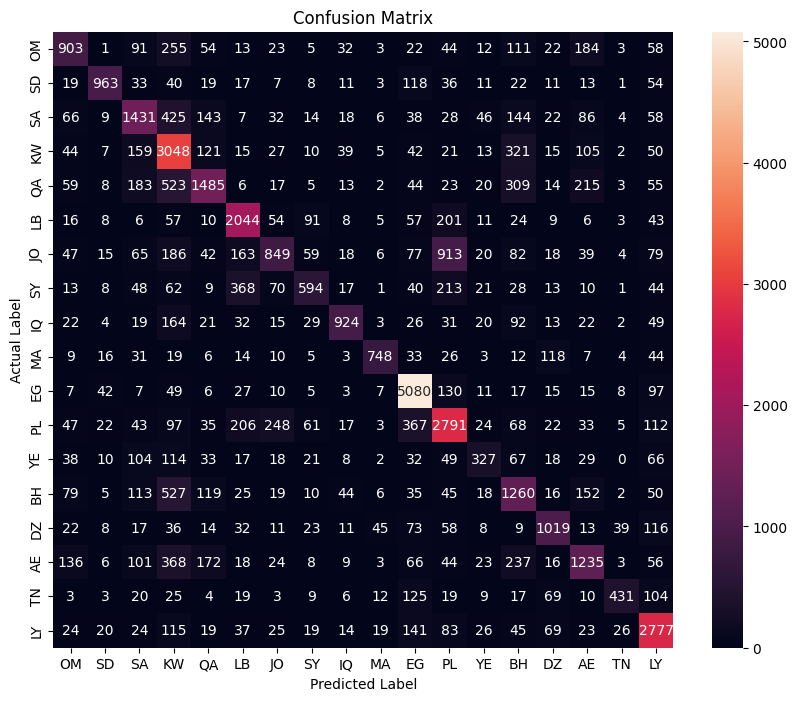

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

test_labels = np.array(test_dataset["labels"])

conf_matrix  = confusion_matrix(test_labels, logits)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
class_names = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']
sns.heatmap(conf_matrix , annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(test_labels, logits, target_names=class_names, digits=4)
print("Classification Report:\n\n\n", report)

Classification Report:


               precision    recall  f1-score   support

          OM     0.5811    0.4918    0.5327      1836
          SD     0.8338    0.6948    0.7580      1386
          SA     0.5735    0.5553    0.5643      2577
          KW     0.4989    0.7537    0.6004      4044
          QA     0.6423    0.4977    0.5608      2984
          LB     0.6680    0.7704    0.7156      2653
          JO     0.5807    0.3166    0.4097      2682
          SY     0.6086    0.3808    0.4685      1560
          IQ     0.7732    0.6210    0.6888      1488
          MA     0.8510    0.6751    0.7529      1108
          EG     0.7918    0.9176    0.8501      5536
          PL     0.5870    0.6644    0.6233      4201
          YE     0.5249    0.3431    0.4150       953
          BH     0.4398    0.4990    0.4675      2525
          DZ     0.6798    0.6557    0.6675      1554
          AE     0.5621    0.4891    0.5231      2525
          TN     0.7967    0.4854    0.6032       888
 

oman 53%
jordan 40%
yemen 40%
bahrain 45%
emirates 50%
syria 50%